In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
janssendata = pd.read_csv('../data/COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv')
pfizerdata = pd.read_csv('../data/COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv')
modernadata = pd.read_csv('../data/COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv')


# Read in data

# Create total and manufacturer columns

# Get the total number of vaccines by manufacturer

# Create a pie chart to show vaccine allocation by manufacturer in the US

# Create a bar chart to show total vaccies by jurisdiction


In [42]:
#total columns
janssendata["Total"] = janssendata['1st Dose Allocations']
pfizerdata["Total"] = pfizerdata['1st Dose Allocations'] + pfizerdata['2nd Dose Allocations']
modernadata["Total"] = modernadata['1st Dose Allocations'] + modernadata['2nd Dose Allocations']
print(janssendata.head())
print(pfizerdata.head())
print(modernadata.head())

pfizerdata['Manufacturer'] = 'Pfizer'
modernadata['Manufacturer'] = 'Moderna'
janssendata['Manufacturer'] = 'Janssen'

    Jurisdiction Week of Allocations  1st Dose Allocations  Total
0    Connecticut          05/03/2021                  8300   8300
1          Maine          05/03/2021                  3200   3200
2  Massachusetts          05/03/2021                 16000  16000
3  New Hampshire          05/03/2021                  3200   3200
4   Rhode Island          05/03/2021                  2500   2500
    Jurisdiction Week of Allocations  1st Dose Allocations  \
0    Connecticut          05/03/2021                 54990   
1          Maine          05/03/2021                 21060   
2  Massachusetts          05/03/2021                105300   
3  New Hampshire          05/03/2021                 21060   
4   Rhode Island          05/03/2021                 16380   

   2nd Dose Allocations   Total  
0                 54990  109980  
1                 21060   42120  
2                105300  210600  
3                 21060   42120  
4                 16380   32760  
    Jurisdiction Week of Al

In [43]:
#Janssen Total Cases
jtotal = janssendata['Total'].sum()
print("Janssen Total Number of Vaccines: " + f'{jtotal:,}')

Janssen Total Number of Vaccines: 12,041,200


In [44]:
#Pfizer Total Cases
ptotal = pfizerdata['Total'].sum()
print("Pfizer Total Number of Vaccines: " + f'{ptotal:,}')

Pfizer Total Number of Vaccines: 147,562,350


In [45]:
#Moderna Total Cases
mtotal = modernadata['Total'].sum()
print("Moderna Total Number of Vaccines: " + f'{mtotal:,}')

Moderna Total Number of Vaccines: 129,164,380


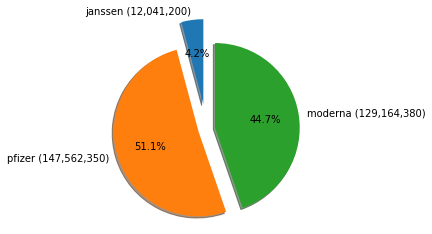

In [46]:
#piechart
total = jtotal + ptotal + mtotal
janssenpercent = (jtotal / total) * 100
pfizerpercent = (ptotal / total) * 100
modernapercent = (mtotal / total) * 100
labels = 'janssen (' + f'{jtotal:,}' + ')', 'pfizer (' + f'{ptotal:,}' + ')', 'moderna (' + f'{mtotal:,}' + ')'
sizes = [janssenpercent, pfizerpercent, modernapercent]
explode = (0.3, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

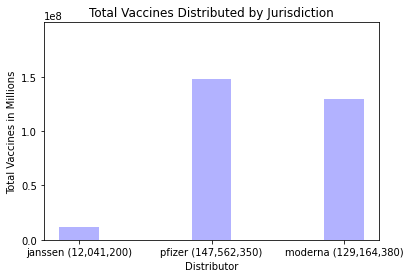

In [47]:
# Create a bar chart to show total vaccines by Distributor
vaccines = [jtotal, ptotal, mtotal]
labels = 'janssen (' + f'{jtotal:,}' + ')', 'pfizer (' + f'{ptotal:,}' + ')', 'moderna (' + f'{mtotal:,}' + ')'
plt.xticks(range(len(vaccines)), labels)
plt.xlabel('Distributor')
plt.ylabel('Total Vaccines in Millions')
plt.title('Total Vaccines Distributed by Jurisdiction')
plt.ylim([0,200000000])
listOf_Yticks = np.arange(0, 200000000, 50000000)
plt.yticks(listOf_Yticks)
plt.bar(range(len(vaccines)), vaccines, color='blue', alpha=.3, width= 0.3)
plt.show()

Jurisdiction
Alabama           4088020
Alaska             936700
American Samoa      64510
Arizona           5795780
Arkansas          2490760
                   ...   
Virginia          7096250
Washington        6239010
West Virginia     1591320
Wisconsin         4903240
Wyoming            504960
Name: Total, Length: 63, dtype: int64
Current size: [24.0, 9.0]


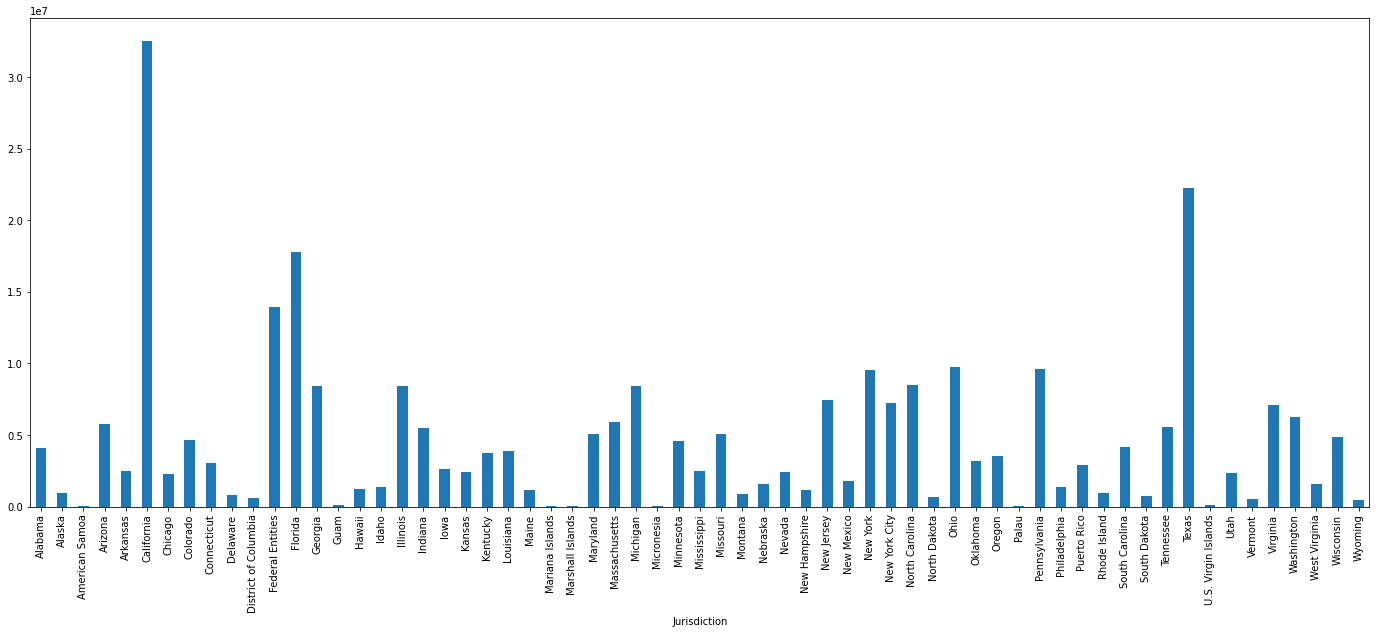

In [52]:
#Bar chart to show total number of vaccines per State
dataset = pd.concat([pfizerdata, modernadata, janssendata])
groupedByJurisdiction = dataset.groupby(['Jurisdiction'])['Total'].sum()
print(groupedByJurisdiction)
groupedByJurisdiction.plot(kind="bar")
fig_size = plt.rcParams["figure.figsize"] 
print("Current size:", fig_size)           
fig_size[0] = 28                          
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size